In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('C:\\Users\\pawan\\Desktop\\case study\\application_data.csv')
previous_application = pd.read_csv('C:\\Users\\pawan\\Desktop\\case study\\previous_application.csv')

In [4]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df.shape

(307511, 122)

In [6]:
df.isnull().sum().sort_values(ascending = False).head(60)

COMMONAREA_MEDI                 214865
COMMONAREA_AVG                  214865
COMMONAREA_MODE                 214865
NONLIVINGAPARTMENTS_MODE        213514
NONLIVINGAPARTMENTS_MEDI        213514
NONLIVINGAPARTMENTS_AVG         213514
FONDKAPREMONT_MODE              210295
LIVINGAPARTMENTS_MEDI           210199
LIVINGAPARTMENTS_MODE           210199
LIVINGAPARTMENTS_AVG            210199
FLOORSMIN_MEDI                  208642
FLOORSMIN_MODE                  208642
FLOORSMIN_AVG                   208642
YEARS_BUILD_MEDI                204488
YEARS_BUILD_AVG                 204488
YEARS_BUILD_MODE                204488
OWN_CAR_AGE                     202929
LANDAREA_MODE                   182590
LANDAREA_AVG                    182590
LANDAREA_MEDI                   182590
BASEMENTAREA_MEDI               179943
BASEMENTAREA_AVG                179943
BASEMENTAREA_MODE               179943
EXT_SOURCE_1                    173378
NONLIVINGAREA_MEDI              169682
NONLIVINGAREA_AVG        

In [7]:
# percentage of missing values in each column
(round(df.isnull().sum()/len(df.index), 2)*100).sort_values(ascending = False).head(60)

COMMONAREA_AVG                  70.0
COMMONAREA_MODE                 70.0
COMMONAREA_MEDI                 70.0
NONLIVINGAPARTMENTS_MODE        69.0
NONLIVINGAPARTMENTS_MEDI        69.0
NONLIVINGAPARTMENTS_AVG         69.0
FLOORSMIN_MEDI                  68.0
FONDKAPREMONT_MODE              68.0
LIVINGAPARTMENTS_MEDI           68.0
FLOORSMIN_AVG                   68.0
LIVINGAPARTMENTS_AVG            68.0
FLOORSMIN_MODE                  68.0
LIVINGAPARTMENTS_MODE           68.0
YEARS_BUILD_MODE                66.0
YEARS_BUILD_AVG                 66.0
YEARS_BUILD_MEDI                66.0
OWN_CAR_AGE                     66.0
LANDAREA_MODE                   59.0
BASEMENTAREA_AVG                59.0
BASEMENTAREA_MODE               59.0
LANDAREA_MEDI                   59.0
BASEMENTAREA_MEDI               59.0
LANDAREA_AVG                    59.0
EXT_SOURCE_1                    56.0
NONLIVINGAREA_MEDI              55.0
NONLIVINGAREA_AVG               55.0
NONLIVINGAREA_MODE              55.0
E

In [8]:
# Removing the columns whose bulk of datas are absent for customers
# Removing the columns having more than 45% missing values as next column with highest missing value percentage is about 30%
missing_columns = df.columns[100*(df.isnull().sum()/len(df.index)) >= 45]
print(missing_columns)

Index(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FO

In [9]:
df_1 = df.drop(missing_columns, axis=1)
print(df_1.shape)

(307511, 73)


In [10]:
(round(df_1.isnull().sum()/len(df_1.index), 2)*100).sort_values(ascending = False).head(10)

OCCUPATION_TYPE                31.0
EXT_SOURCE_3                   20.0
AMT_REQ_CREDIT_BUREAU_HOUR     14.0
AMT_REQ_CREDIT_BUREAU_QRT      14.0
AMT_REQ_CREDIT_BUREAU_YEAR     14.0
AMT_REQ_CREDIT_BUREAU_DAY      14.0
AMT_REQ_CREDIT_BUREAU_WEEK     14.0
AMT_REQ_CREDIT_BUREAU_MON      14.0
REGION_RATING_CLIENT_W_CITY     0.0
REGION_RATING_CLIENT            0.0
dtype: float64

In [11]:
df_1.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

In [12]:
#The documents required for loan is not prioritized and these documents can be collected anytime for compliance requirements
#Hence we are dropping the FLAG_DOCUMENT_XX columns  
df_1 = df_1.drop(df_1.loc[:,'FLAG_DOCUMENT_2':'FLAG_DOCUMENT_21'], axis = 1)

In [13]:
df_1.shape

(307511, 53)

In [14]:
df_1.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

In [15]:
df_1.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0.0,0.0,0.0,-2536.0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0.0,1.0,0.0,-1562.0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0.0,2.0,0.0,-1070.0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0.0,2.0,0.0,-1673.0,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
(round(df_1.isnull().sum()/len(df_1.index), 2)*100).sort_values(ascending = False).head(10)

OCCUPATION_TYPE               31.0
EXT_SOURCE_3                  20.0
AMT_REQ_CREDIT_BUREAU_YEAR    14.0
AMT_REQ_CREDIT_BUREAU_HOUR    14.0
AMT_REQ_CREDIT_BUREAU_QRT     14.0
AMT_REQ_CREDIT_BUREAU_DAY     14.0
AMT_REQ_CREDIT_BUREAU_WEEK    14.0
AMT_REQ_CREDIT_BUREAU_MON     14.0
DAYS_ID_PUBLISH                0.0
DAYS_REGISTRATION              0.0
dtype: float64

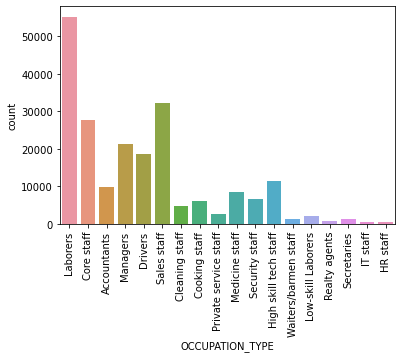

In [17]:
# CountPlot for Occupation Type Column
sns.countplot(x= 'OCCUPATION_TYPE', data = df_1)
plt.xticks(rotation = 90)
plt.show()
# Here we can observe that most of the customers are labourers but we cannot substitute the missing values with it 
# Hence we are not imputing any values in it as of now

In [18]:
df_1.EXT_SOURCE_3.describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

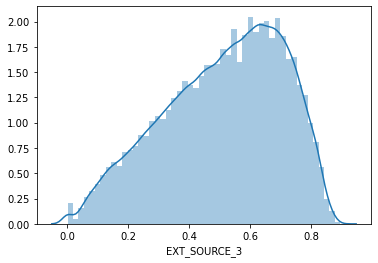

In [19]:
sns.distplot(df_1.EXT_SOURCE_3)
plt.show()

In [20]:
 df_1.EXT_SOURCE_3.mean()

0.5108529061800121

In [21]:
df_1.EXT_SOURCE_3.median()

0.5352762504724826

**From the Curve we can observe that the data is a negatively skewed normal distribution.**
**The difference between mean and median is not so much but we would substitute the missing values with the mean value as per the central limit theorem**

In [22]:
df_1.EXT_SOURCE_3 = df_1.EXT_SOURCE_3.fillna(df_1.EXT_SOURCE_3.mean())

In [23]:
df_1.EXT_SOURCE_3.isnull().sum()

0

In [24]:
df_1.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts()

0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0        4
16.0        3
21.0        1
23.0        1
25.0        1
20.0        1
22.0        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

In [25]:
#Filling the column with the mode value 
df_1.AMT_REQ_CREDIT_BUREAU_YEAR = df_1.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(df_1.AMT_REQ_CREDIT_BUREAU_YEAR.mode()[0])

In [26]:
df_1.AMT_REQ_CREDIT_BUREAU_YEAR.isnull().sum()

0

In [27]:
df_1.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts()

0.0    264366
1.0      1560
2.0        56
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

In [28]:
#Filling the column with the mode value 
df_1.AMT_REQ_CREDIT_BUREAU_HOUR = df_1.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(df_1.AMT_REQ_CREDIT_BUREAU_HOUR.mode()[0])

In [29]:
df_1.AMT_REQ_CREDIT_BUREAU_QRT.value_counts()

0.0      215417
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
7.0           7
8.0           7
19.0          1
261.0         1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

In [30]:
#Filling the column with the mode value 
df_1.AMT_REQ_CREDIT_BUREAU_QRT = df_1.AMT_REQ_CREDIT_BUREAU_QRT.fillna(df_1.AMT_REQ_CREDIT_BUREAU_QRT.mode()[0])

In [31]:
#Filling the column with the mode value 
df_1.AMT_REQ_CREDIT_BUREAU_DAY = df_1.AMT_REQ_CREDIT_BUREAU_DAY.fillna(df_1.AMT_REQ_CREDIT_BUREAU_DAY.mode()[0])

In [32]:
#Filling the column with the mode value 
df_1.AMT_REQ_CREDIT_BUREAU_WEEK = df_1.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(df_1.AMT_REQ_CREDIT_BUREAU_WEEK.mode()[0])

In [33]:
#Filling the column with the mode value 
df_1.AMT_REQ_CREDIT_BUREAU_MON = df_1.AMT_REQ_CREDIT_BUREAU_MON.fillna(df_1.AMT_REQ_CREDIT_BUREAU_MON.mode()[0])

In [34]:
df_1.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
O

In [35]:
#categroical columns
cols = list(set(df_1.columns)-set(df_1.describe().columns))

In [36]:
# modes of categorical variables 
df_1[cols].mode().iloc[0]

WEEKDAY_APPR_PROCESS_START                          TUESDAY
NAME_TYPE_SUITE                               Unaccompanied
NAME_FAMILY_STATUS                                  Married
NAME_INCOME_TYPE                                    Working
NAME_CONTRACT_TYPE                               Cash loans
ORGANIZATION_TYPE                    Business Entity Type 3
FLAG_OWN_CAR                                              N
NAME_EDUCATION_TYPE           Secondary / secondary special
FLAG_OWN_REALTY                                           Y
NAME_HOUSING_TYPE                         House / apartment
CODE_GENDER                                               F
OCCUPATION_TYPE                                    Laborers
Name: 0, dtype: object

In [37]:
#For analysis we are filling all categorical columns with its mode values
df_1[cols]= df_1[cols].fillna(df_1.mode().iloc[0])

In [38]:
df_1[cols].isna().sum()

WEEKDAY_APPR_PROCESS_START    0
NAME_TYPE_SUITE               0
NAME_FAMILY_STATUS            0
NAME_INCOME_TYPE              0
NAME_CONTRACT_TYPE            0
ORGANIZATION_TYPE             0
FLAG_OWN_CAR                  0
NAME_EDUCATION_TYPE           0
FLAG_OWN_REALTY               0
NAME_HOUSING_TYPE             0
CODE_GENDER                   0
OCCUPATION_TYPE               0
dtype: int64

In [39]:
# Filling the rest of the numerical column with mean
cols_1 = list(set(df_1.describe().columns))
df_1[cols_1].isna().sum()

FLAG_PHONE                        0
DAYS_LAST_PHONE_CHANGE            1
EXT_SOURCE_3                      0
AMT_REQ_CREDIT_BUREAU_WEEK        0
REGION_RATING_CLIENT              0
OBS_30_CNT_SOCIAL_CIRCLE       1021
DAYS_EMPLOYED                     0
AMT_REQ_CREDIT_BUREAU_DAY         0
FLAG_EMP_PHONE                    0
CNT_CHILDREN                      0
HOUR_APPR_PROCESS_START           0
EXT_SOURCE_2                    660
REG_REGION_NOT_LIVE_REGION        0
AMT_REQ_CREDIT_BUREAU_MON         0
AMT_REQ_CREDIT_BUREAU_HOUR        0
DAYS_BIRTH                        0
LIVE_CITY_NOT_WORK_CITY           0
DAYS_ID_PUBLISH                   0
DEF_60_CNT_SOCIAL_CIRCLE       1021
DAYS_REGISTRATION                 0
AMT_REQ_CREDIT_BUREAU_YEAR        0
REGION_RATING_CLIENT_W_CITY       0
AMT_ANNUITY                      12
REG_REGION_NOT_WORK_REGION        0
DEF_30_CNT_SOCIAL_CIRCLE       1021
FLAG_EMAIL                        0
AMT_GOODS_PRICE                 278
REG_CITY_NOT_LIVE_CITY      

In [40]:
df_1[cols_1] = df_1[cols_1].fillna(df_1[cols_1].mean())

In [41]:
nulls = df_1.isnull().sum()
print(nulls[nulls > 0])

Series([], dtype: int64)


In [42]:
previous_application.shape

(1670214, 37)

In [43]:
previous_application.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [44]:
(round(previous_application.isnull().sum()/len(previous_application.index), 2)*100).sort_values(ascending = False).head(60)

RATE_INTEREST_PRIMARY          100.0
RATE_INTEREST_PRIVILEGED       100.0
RATE_DOWN_PAYMENT               54.0
AMT_DOWN_PAYMENT                54.0
NAME_TYPE_SUITE                 49.0
DAYS_TERMINATION                40.0
NFLAG_INSURED_ON_APPROVAL       40.0
DAYS_FIRST_DRAWING              40.0
DAYS_FIRST_DUE                  40.0
DAYS_LAST_DUE_1ST_VERSION       40.0
DAYS_LAST_DUE                   40.0
AMT_GOODS_PRICE                 23.0
CNT_PAYMENT                     22.0
AMT_ANNUITY                     22.0
NAME_CONTRACT_TYPE               0.0
AMT_APPLICATION                  0.0
SK_ID_CURR                       0.0
WEEKDAY_APPR_PROCESS_START       0.0
HOUR_APPR_PROCESS_START          0.0
FLAG_LAST_APPL_PER_CONTRACT      0.0
NFLAG_LAST_APPL_IN_DAY           0.0
AMT_CREDIT                       0.0
NAME_PAYMENT_TYPE                0.0
NAME_CASH_LOAN_PURPOSE           0.0
NAME_CONTRACT_STATUS             0.0
DAYS_DECISION                    0.0
CODE_REJECT_REASON               0.0
N

In [45]:
# Removing the columns having more than 45% missing values as next column with highest missing value percentage is about 40%
missing_columns_1 = previous_application.columns[100*(previous_application.isnull().sum()/len(previous_application.index)) >= 40]
print(missing_columns_1)

Index(['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_TYPE_SUITE', 'DAYS_FIRST_DRAWING',
       'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE',
       'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')


In [46]:
df_2 = previous_application.drop(missing_columns_1, axis=1)
print(df_2.shape)

(1670214, 26)


In [47]:
df_2.isnull().sum().sort_values(ascending = False).head(6)

AMT_GOODS_PRICE           385515
AMT_ANNUITY               372235
CNT_PAYMENT               372230
PRODUCT_COMBINATION          346
AMT_CREDIT                     1
NAME_CASH_LOAN_PURPOSE         0
dtype: int64

In [48]:
#categorical column filled with mode
df_2.PRODUCT_COMBINATION = df_2.PRODUCT_COMBINATION.fillna(df_2.PRODUCT_COMBINATION.mode().iloc[0])

In [49]:
#numerical columns
cols_2 = list(set(df_2.describe().columns))
cols_2

['NFLAG_LAST_APPL_IN_DAY',
 'AMT_GOODS_PRICE',
 'AMT_CREDIT',
 'CNT_PAYMENT',
 'SK_ID_PREV',
 'AMT_APPLICATION',
 'AMT_ANNUITY',
 'SELLERPLACE_AREA',
 'SK_ID_CURR',
 'DAYS_DECISION',
 'HOUR_APPR_PROCESS_START']

In [50]:
df_2[cols_2] = df_2[cols_2].fillna(df_2[cols_2].mean())

In [51]:
nulls = df_2.isnull().sum()
print(nulls[nulls > 0])

Series([], dtype: int64)


# DATA IS CLEAN

In [52]:
# Merging both the dataframes in final data
final_data=pd.merge(df_1,df_2,left_on ='SK_ID_CURR', right_on ='SK_ID_CURR', how = 'inner' )

In [53]:
final_data.shape

(1413701, 78)

In [54]:
nulls = final_data.isnull().sum()
nulls[nulls > 0]

Series([], dtype: int64)


# Variables to focus on as possible predictor variables 

NAME_CONTRACT_TYPE, CODE_GENDER, CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_HOUSING_TYPE, DAYS_BIRTH, OCCUPATION_TYPE

In [55]:
# converting Age in days to Age in years

# days also have a preceding negative sign 

final_data['Age_years'] = (final_data.DAYS_BIRTH/-365).astype(int)  #-365 to change the values to positive

final_data[['DAYS_BIRTH','Age_years']].head()


,DAYS_BIRTH,Age_years
0,-9461,25
1,-16765,45
2,-16765,45
3,-16765,45
4,-19046,52


In [56]:
# gender has some missing values coded as XNA

#finding their propotion

final_data.CODE_GENDER.value_counts(normalize=True)

F      0.675630
M      0.324331
XNA    0.000039
Name: CODE_GENDER, dtype: float64

In [57]:
# XNA has insignificat propotion hence can be excluded

fdata = final_data[~(final_data['CODE_GENDER']=='XNA')]

In [58]:
fdata.shape

(1413646, 79)

In [59]:
fdata.columns 
# Some columns are not required for our further analysis so we are dropping them
# columns like 'SK_ID_CURR', 'SK_ID_PREV', 'AMT_CREDIT_y', 'AMT_ANNUITY_y', 'AMT_GOODS_PRICE_y', 'WEEKDAY_APPR_PROCESS_START_y'
# 'HOUR_APPR_PROCESS_START_y', 'EXT_SOURCE_2', 'EXT_SOURCE_3'

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START_x', 'HOUR_APPR_PROCESS_START_x',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE

In [60]:
list_1 = ['SK_ID_CURR', 'SK_ID_PREV', 'NAME_CONTRACT_TYPE_y', 'AMT_CREDIT_y', 'AMT_ANNUITY_y', 'AMT_GOODS_PRICE_y', 'WEEKDAY_APPR_PROCESS_START_y', 'HOUR_APPR_PROCESS_START_y', 'EXT_SOURCE_2', 'EXT_SOURCE_3']
fdata = fdata.drop(list_1, axis = 1)

In [61]:
fdata.shape

(1413646, 69)

# Checking for OUTLIERS

### Age Variable

In [62]:
# Age variable
fdata.Age_years.describe()

count    1.413646e+06
mean     4.421432e+01
std      1.190206e+01
min      2.000000e+01
25%      3.400000e+01
50%      4.300000e+01
75%      5.400000e+01
max      6.900000e+01
Name: Age_years, dtype: float64

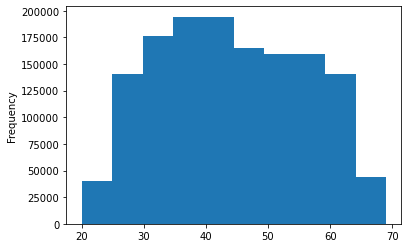

In [63]:
fdata.Age_years.plot.hist()
plt.show()

# age varible seems to have no outliers

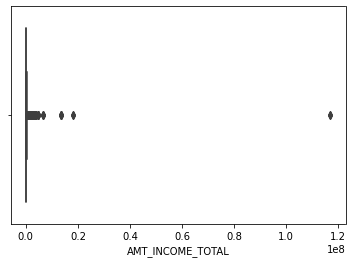

In [64]:
# #### income variable

# plotting a boxplot to visualize any outliers in the income variable

sns.boxplot(fdata.AMT_INCOME_TOTAL)
plt.show()


# income variable has some outliers


In [65]:
# apparent outlier

fdata.AMT_INCOME_TOTAL.describe()

count    1.413646e+06
mean     1.733153e+05
std      1.985770e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.575000e+05
75%      2.070000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [66]:
#AMT_INCOME_TOTAL seems to have an outlier 

#print the quantiles to observe where majority of data lies

fdata.AMT_INCOME_TOTAL.quantile([0.5,0.7,0.9,0.95,0.99])

0.50    157500.0
0.70    202500.0
0.90    270000.0
0.95    337500.0
0.99    450000.0
Name: AMT_INCOME_TOTAL, dtype: float64

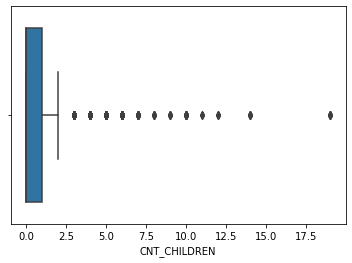

In [67]:
# Children variable

# plotting a boxplot to visualize any outliers 

sns.boxplot(fdata.CNT_CHILDREN)
plt.show()


# seems like it has outliers

In [68]:
fdata.CNT_CHILDREN.describe()

# CNT_CHILDREN seems to have some outliers 

#print the quantiles to observe where mojority of data lies

fdata.CNT_CHILDREN.quantile([0.5,0.7,0.9,0.95,0.99])

0.50    0.0
0.70    0.0
0.90    1.0
0.95    2.0
0.99    3.0
Name: CNT_CHILDREN, dtype: float64

# CHECKING FOR IMBALANCE

In [69]:
# Ratio  for imbalance

(fdata.TARGET==0).sum() / (fdata.TARGET==1).sum()

10.553170970905525

In [70]:
# since there are a lot of imbalance lets separate out theses
train_0 = fdata.loc[fdata.TARGET == 0]
train_1 = fdata.loc[fdata.TARGET == 1]

In [71]:
# categorical columns 
cat_col = list(set(fdata.columns) - set(fdata.describe().columns))
cat_col
len(cat_col)

25

In [72]:
# numerical columns 
num_col = list(set(fdata.describe().columns))
num_col
len(num_col)

44

# UNIVARIATE ANALYSIS

### CATEGORICAL COLUMNS

In [73]:
def plotting(train, train0, train1, column):
    
    train = train
    train_0 = train0
    train_1 = train1
    col = column
    
    fig = plt.figure(figsize=(13,10))
    
    ax1 = plt.subplot(221)
    train[col].value_counts().plot.pie(autopct = "%1.0f%%", ax=ax1)
    plt.title('Plotting data for the column: '+ column)
    
    ax2 = plt.subplot(222)
    sns.countplot(x= column, hue = 'TARGET', data = train, ax = ax2)
    plt.xticks(rotation=90)
    plt.title('Plotting data for target in terms of total count')


    ax3 = plt.subplot(223)
    df = pd.DataFrame()
    df['0']= ((train_0[col].value_counts())/len(train_0))
    df['1']= ((train_1[col].value_counts())/len(train_1))
    df.plot.bar(ax=ax3)
    plt.title('Plotting data for target in terms of percentage')


    fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

    plt.show()

Plotting  WEEKDAY_APPR_PROCESS_START_x


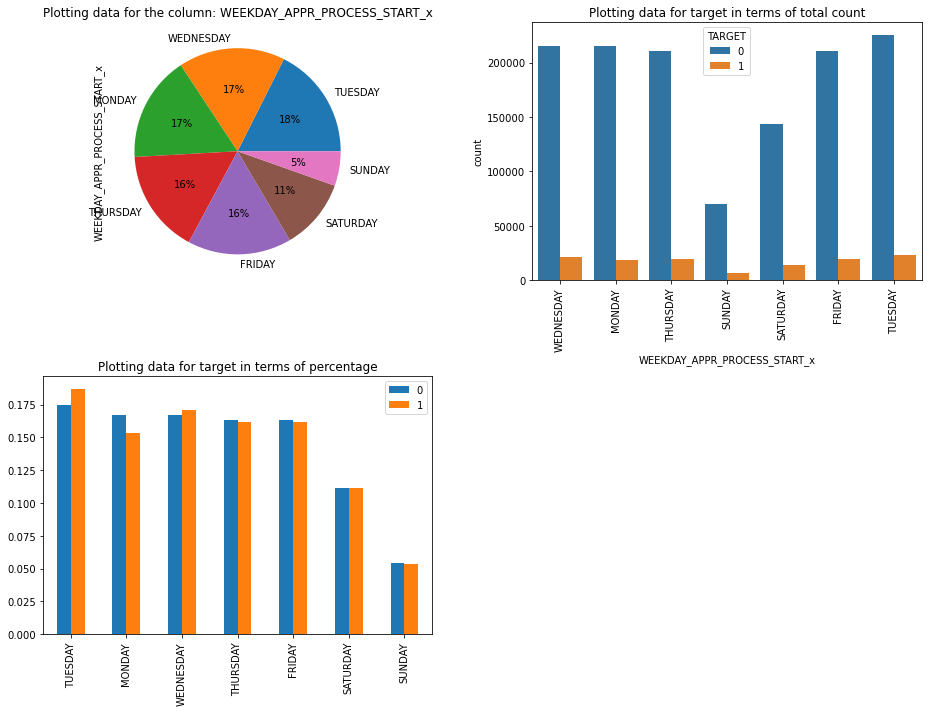

Plotting  FLAG_LAST_APPL_PER_CONTRACT


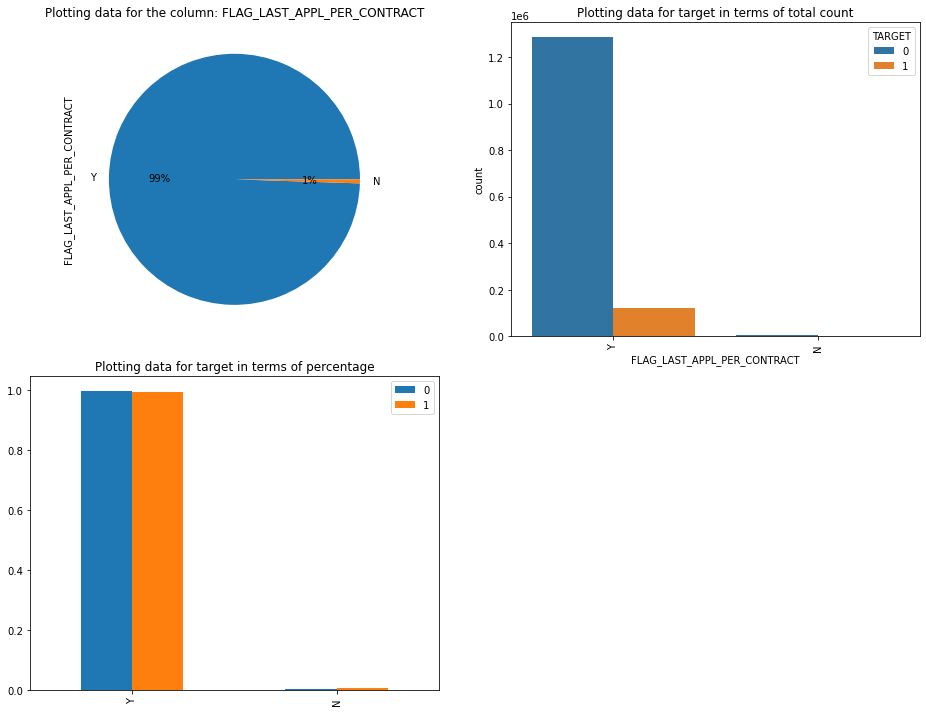

Plotting  NAME_INCOME_TYPE


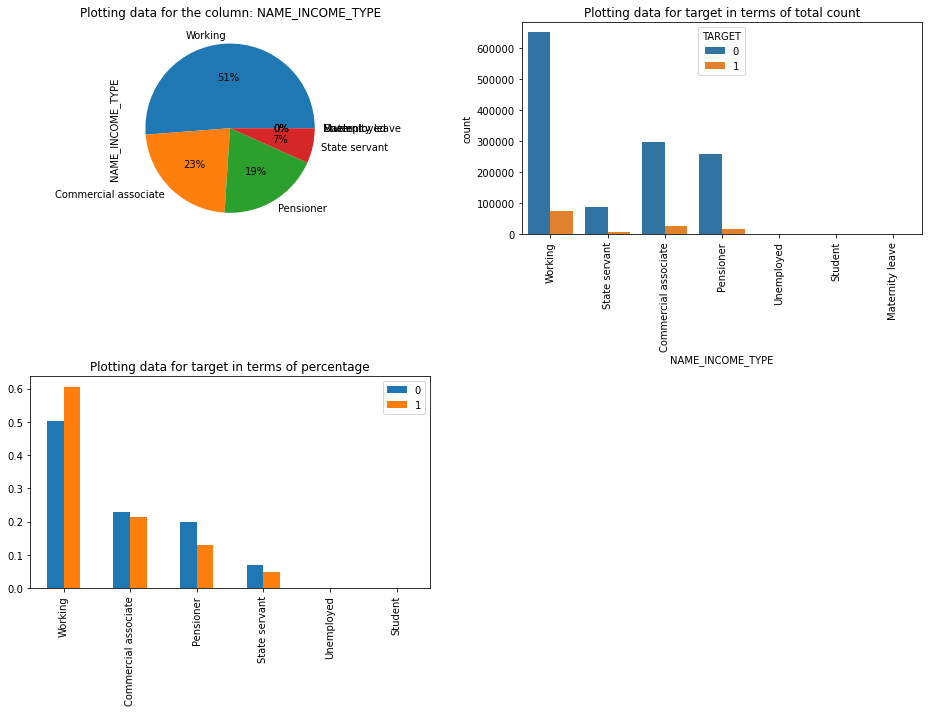

Plotting  NAME_CONTRACT_TYPE_x


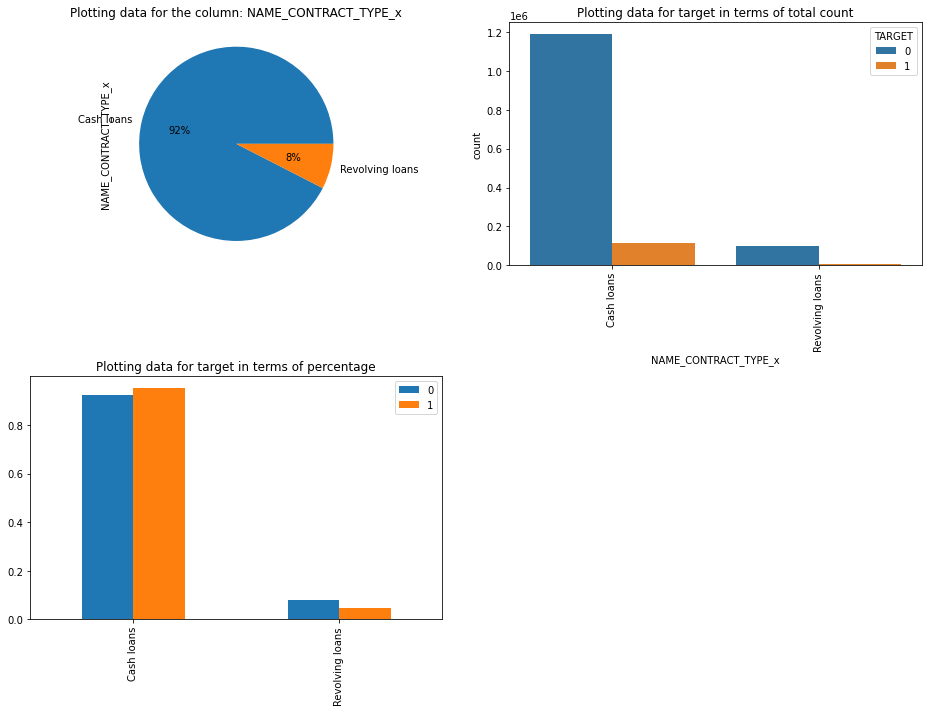

Plotting  NAME_CLIENT_TYPE


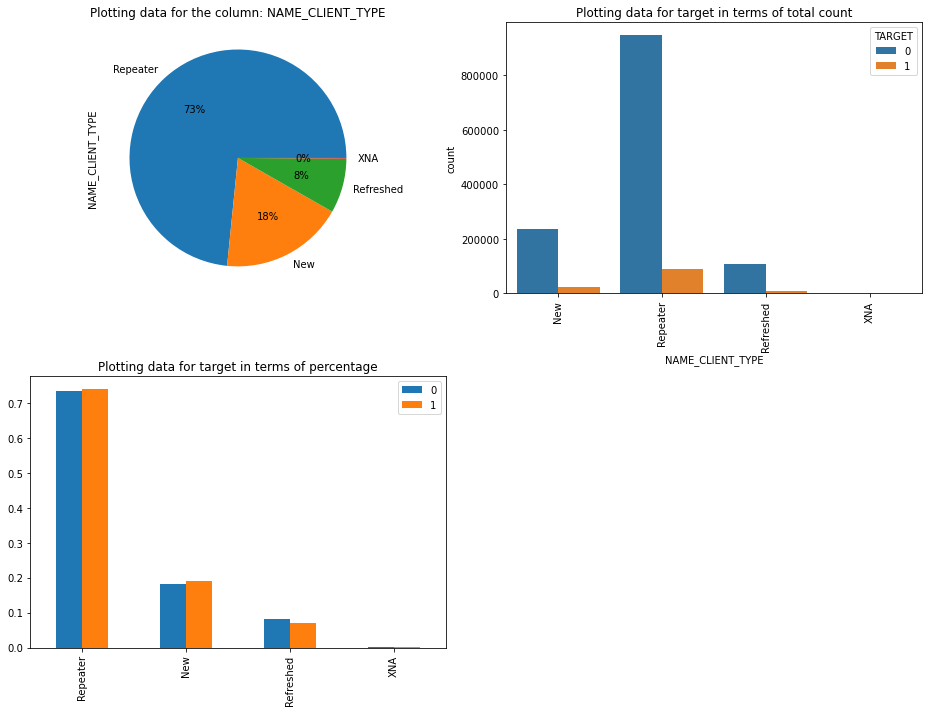

Plotting  NAME_HOUSING_TYPE


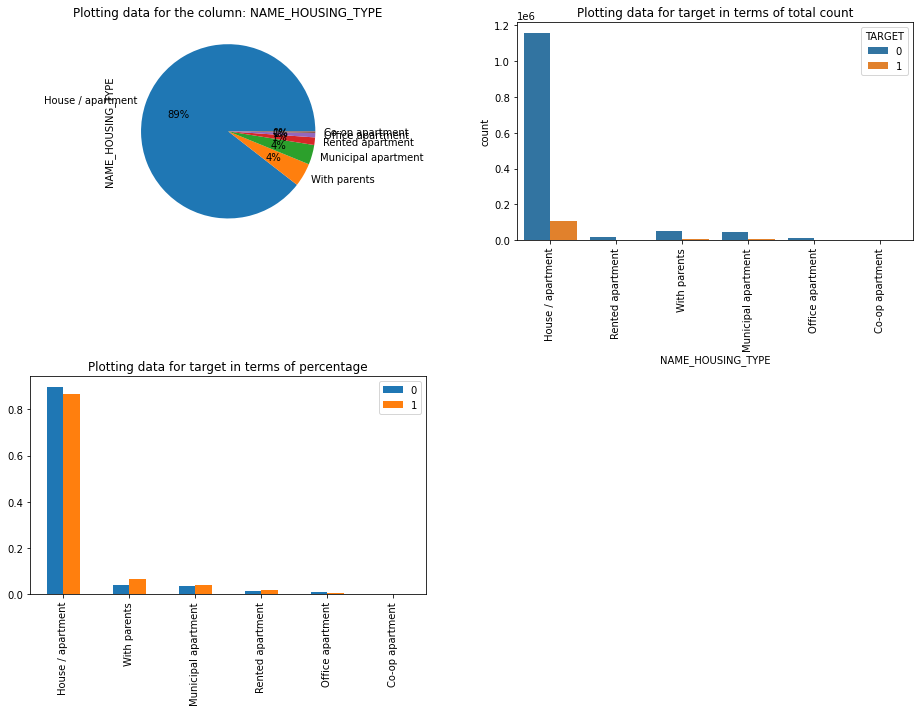

Plotting  NAME_PORTFOLIO


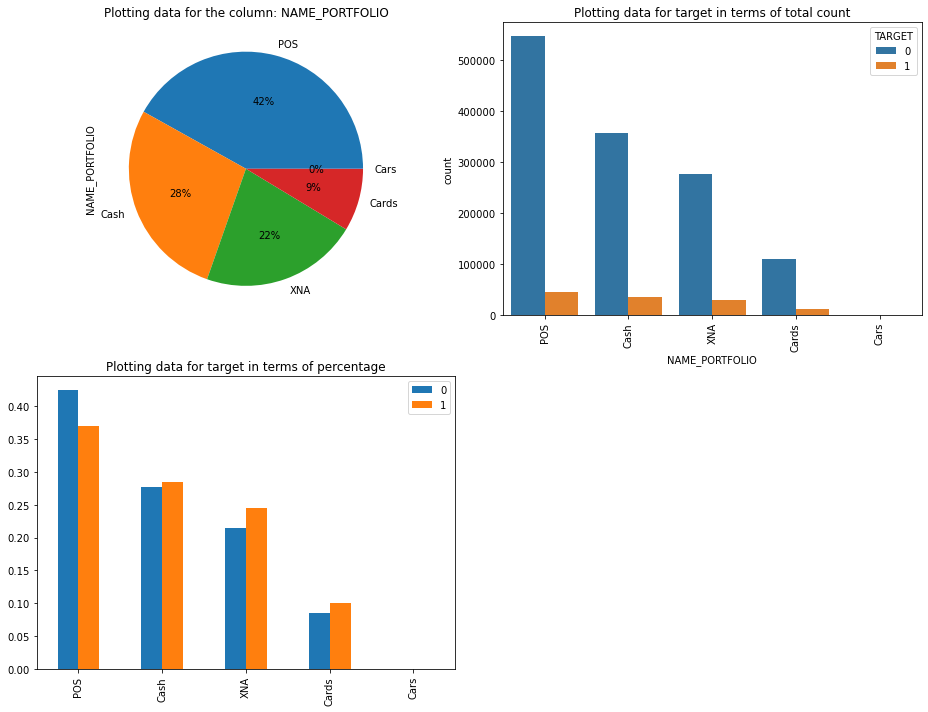

Plotting  FLAG_OWN_CAR


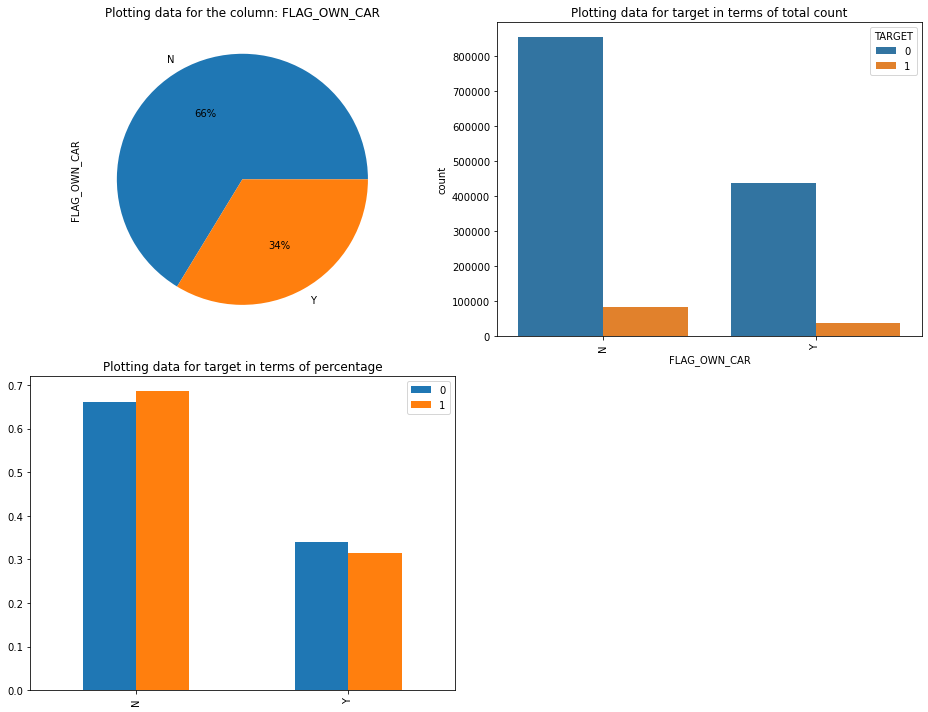

Plotting  NAME_EDUCATION_TYPE


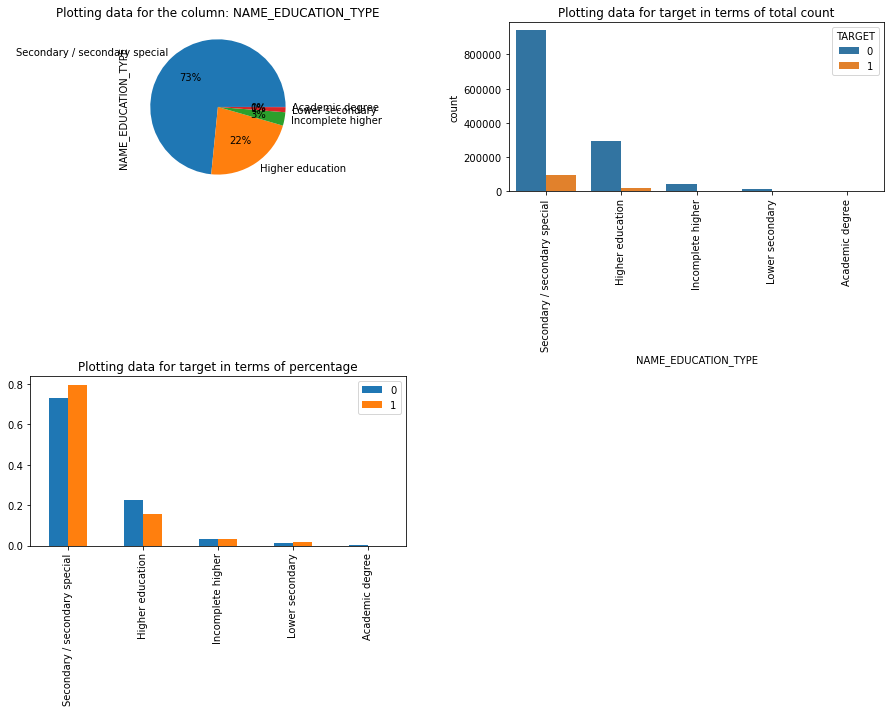

Plotting  CODE_GENDER


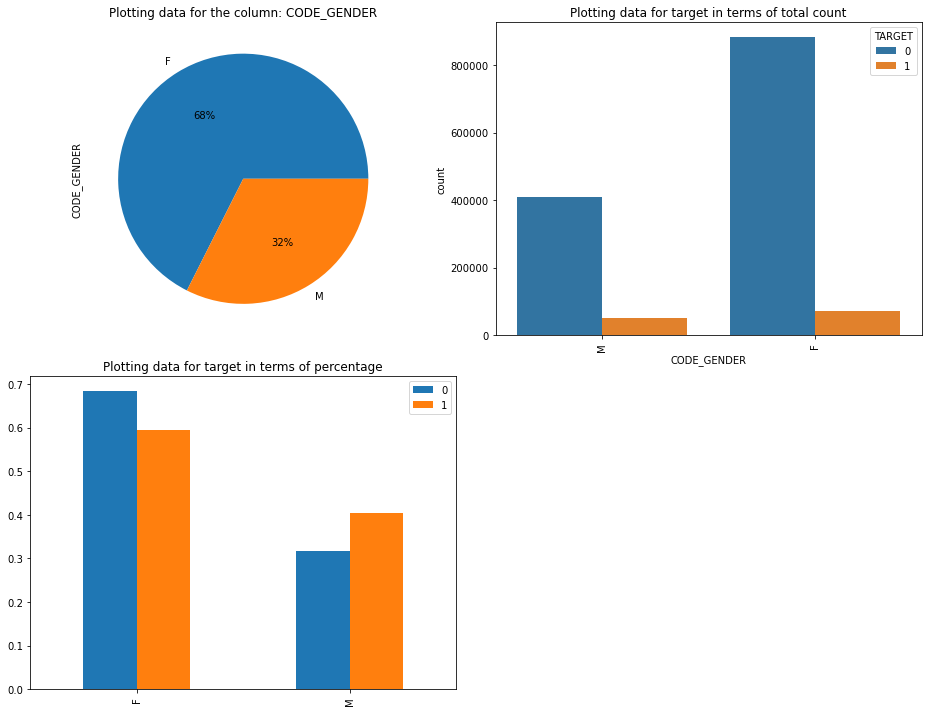

Plotting  NAME_TYPE_SUITE


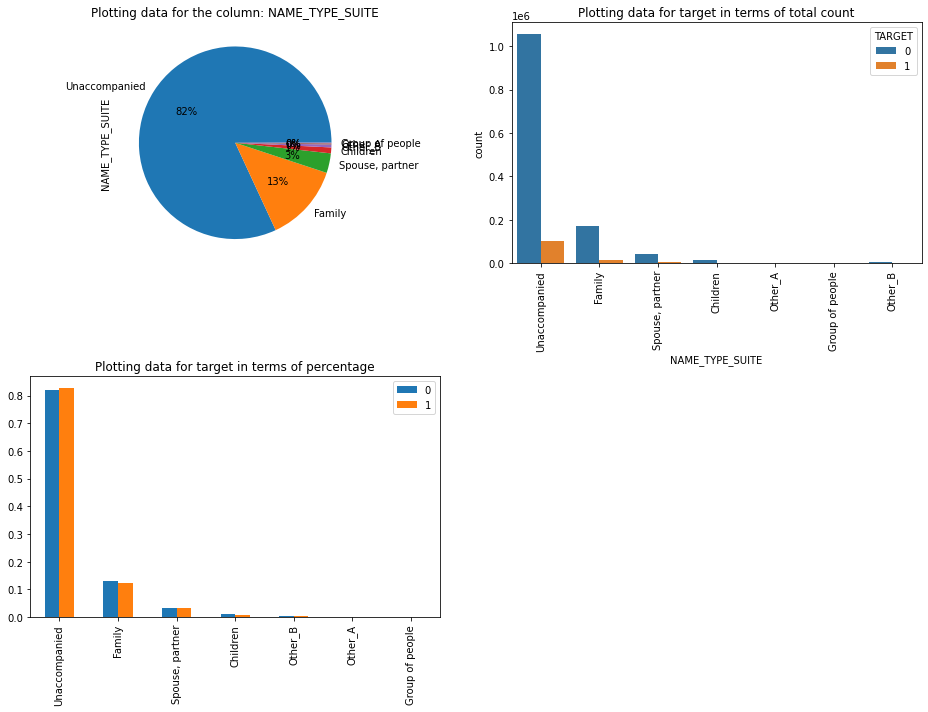

Plotting  PRODUCT_COMBINATION


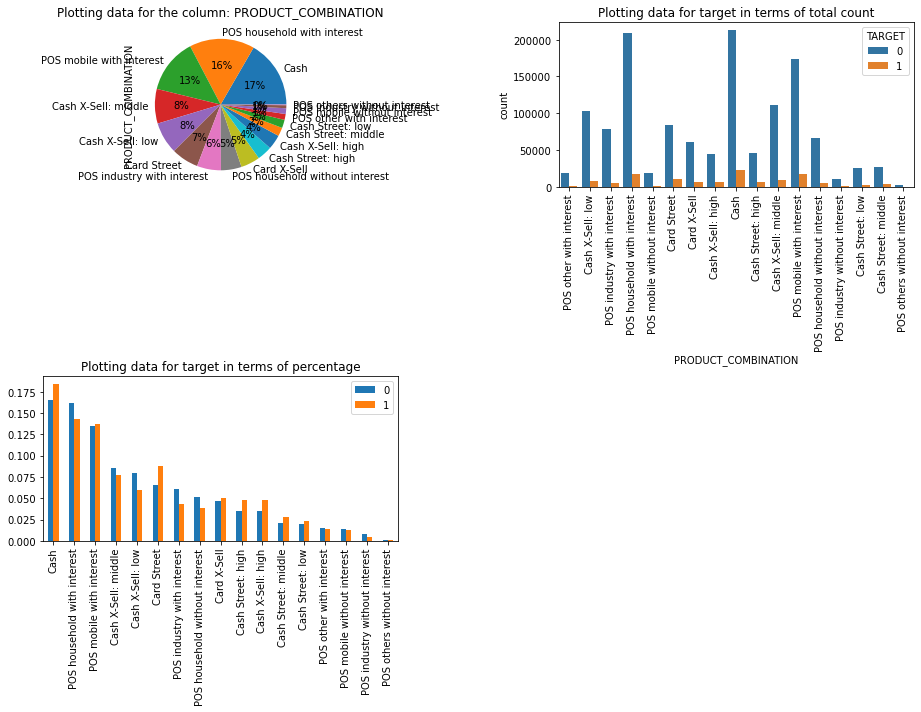

Plotting  NAME_FAMILY_STATUS


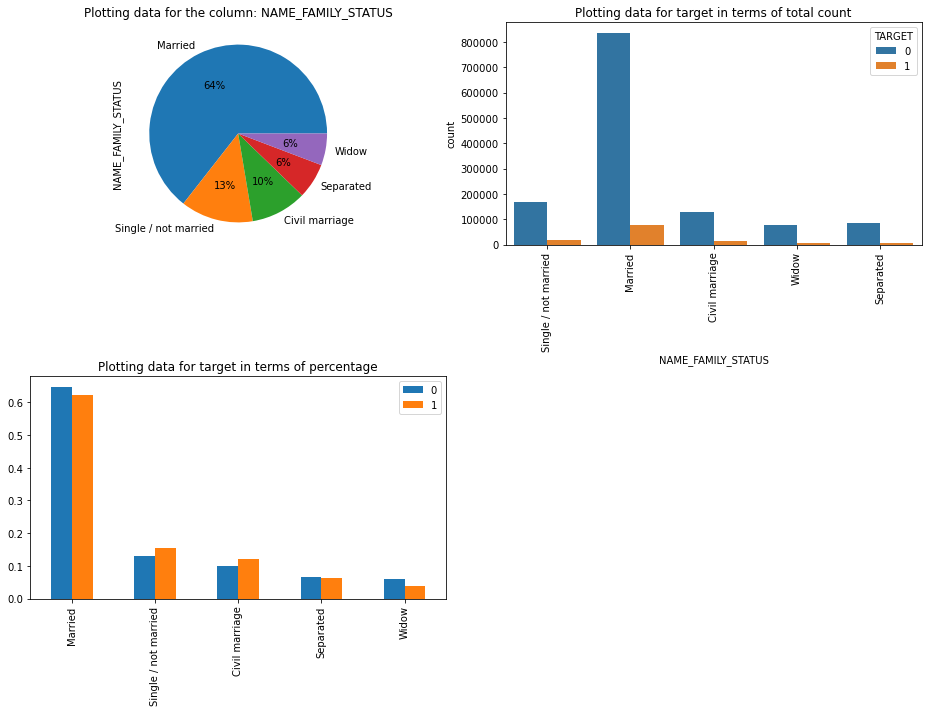

Plotting  NAME_YIELD_GROUP


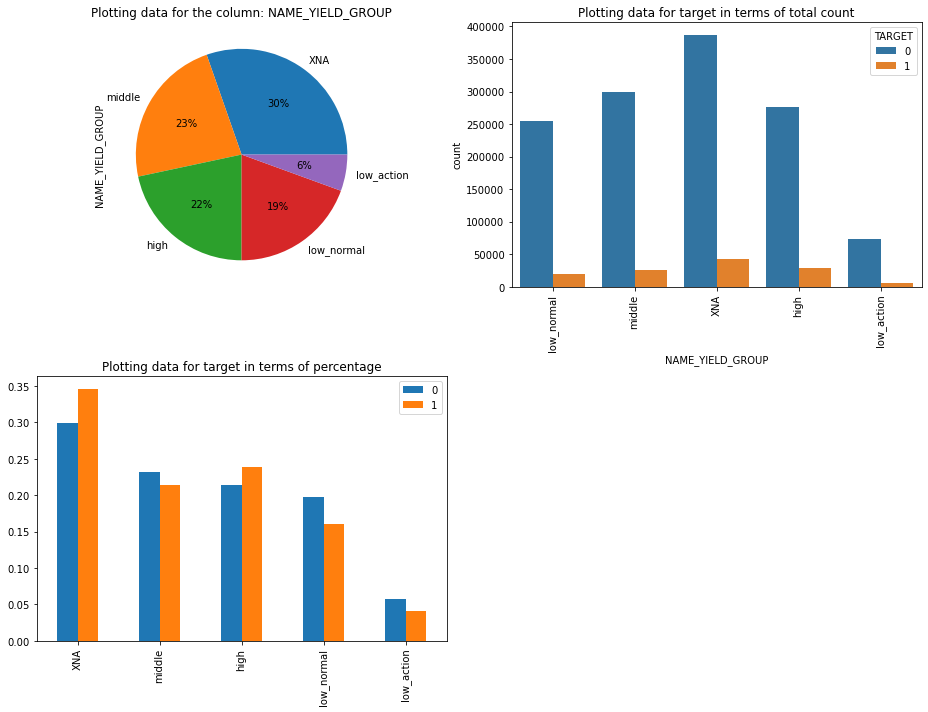

Plotting  ORGANIZATION_TYPE


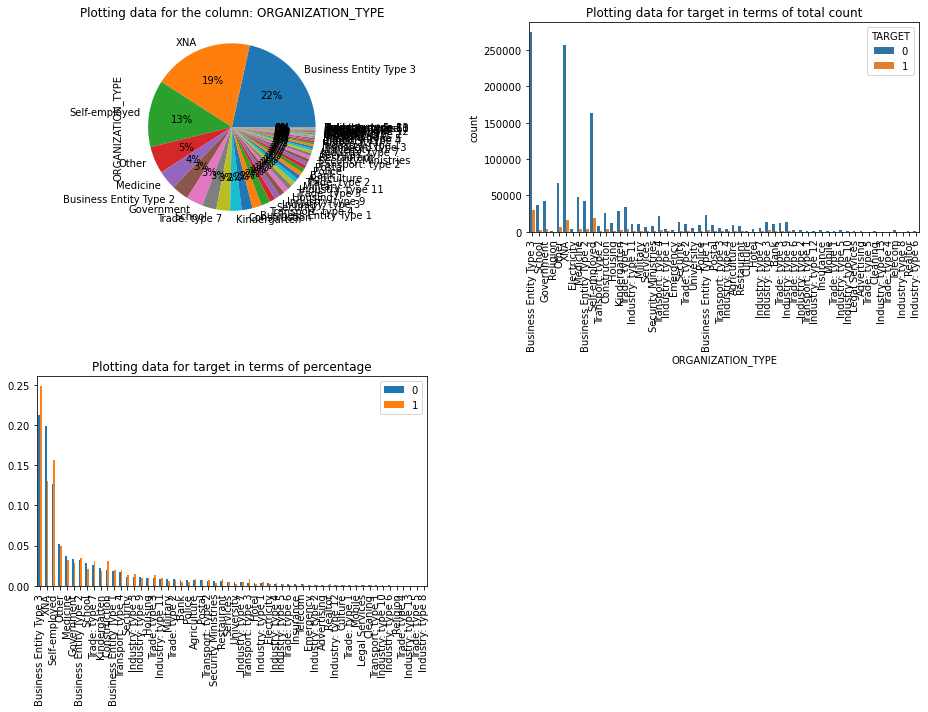

Plotting  NAME_PAYMENT_TYPE


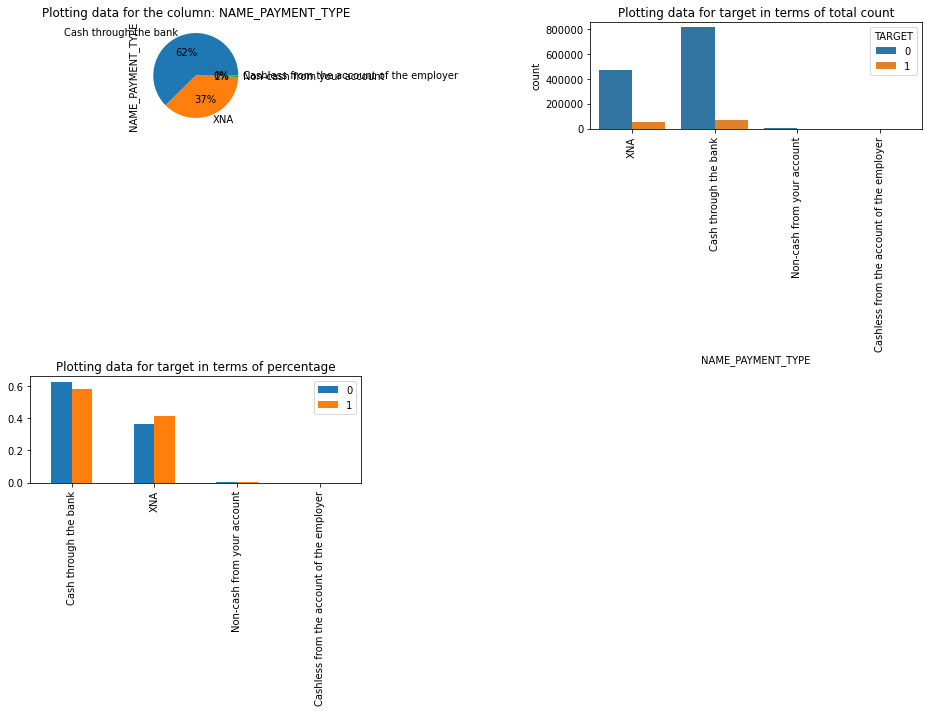

Plotting  NAME_CASH_LOAN_PURPOSE


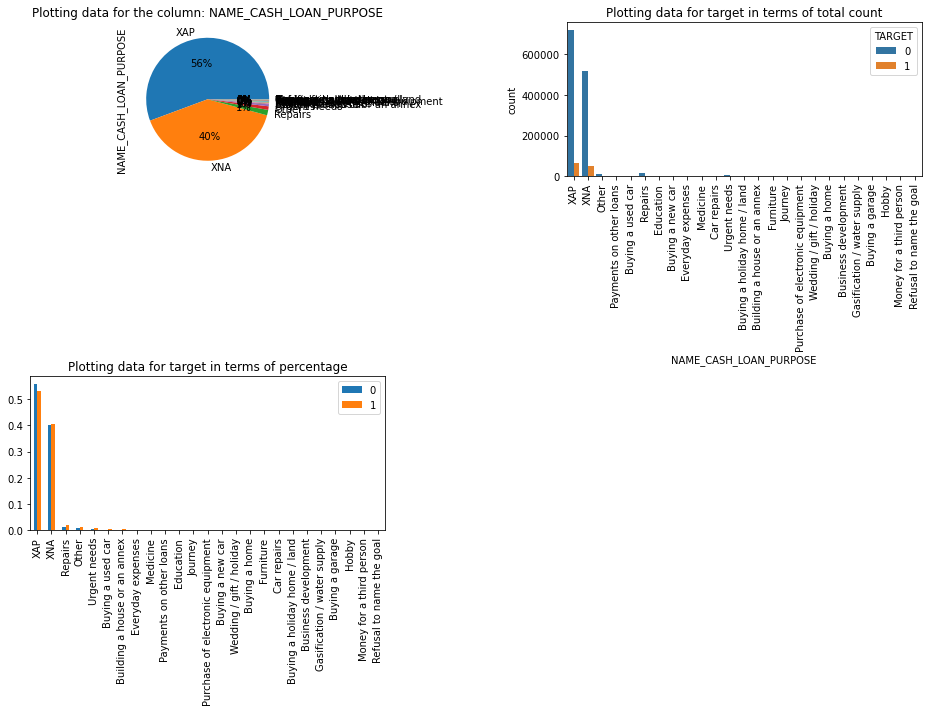

Plotting  NAME_GOODS_CATEGORY


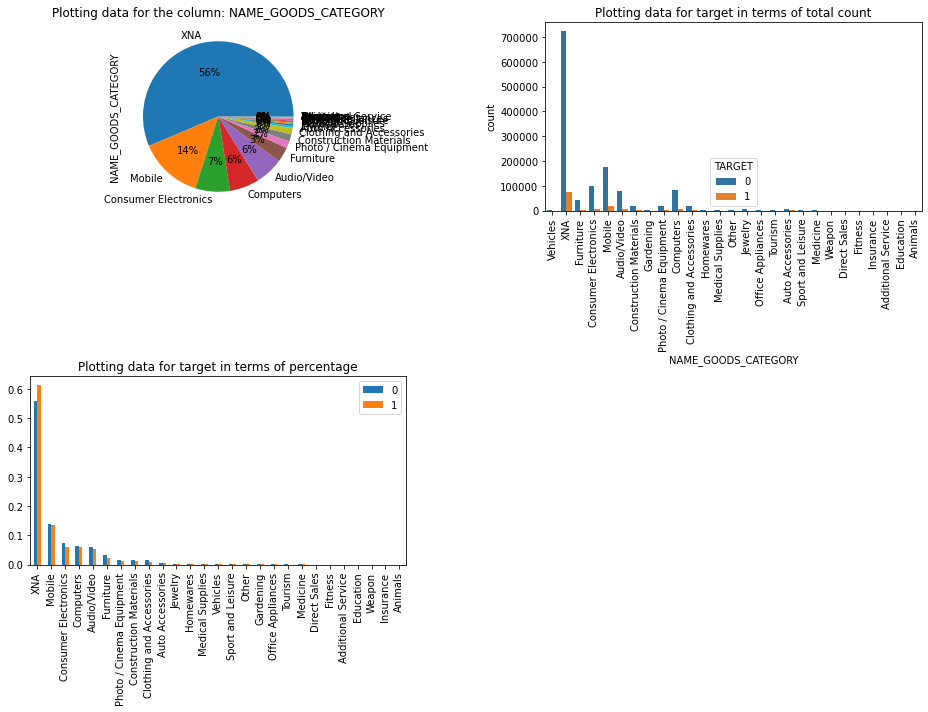

Plotting  CHANNEL_TYPE


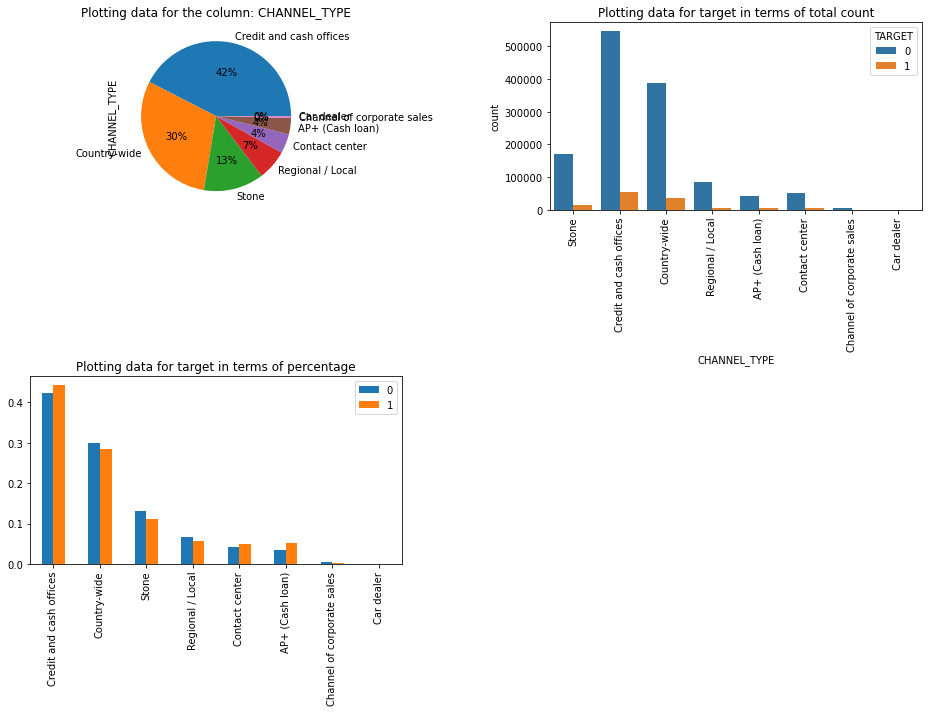

Plotting  NAME_CONTRACT_STATUS


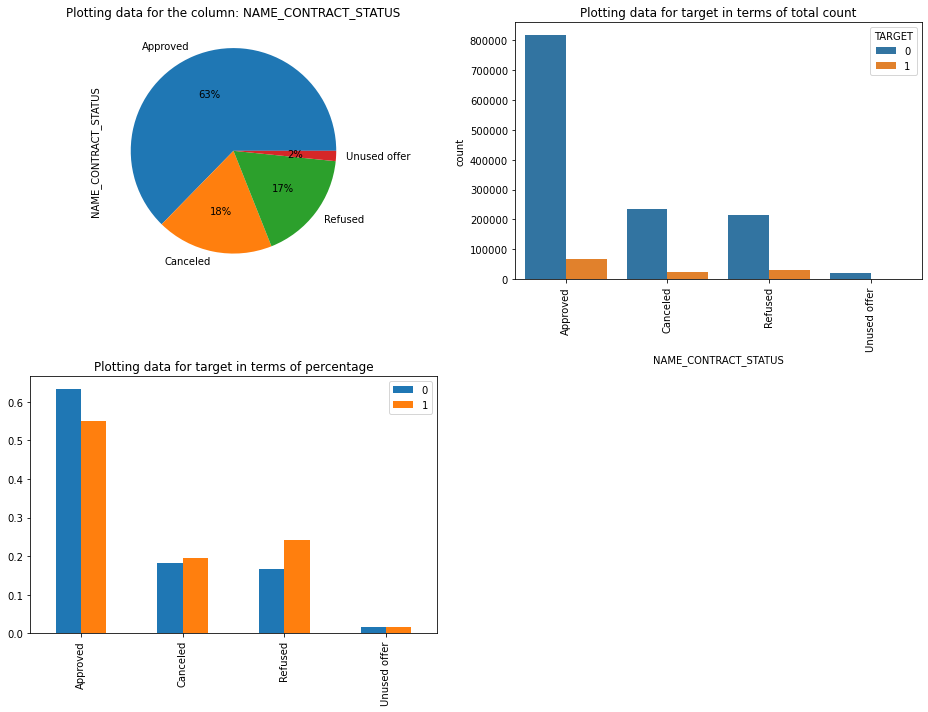

Plotting  NAME_SELLER_INDUSTRY


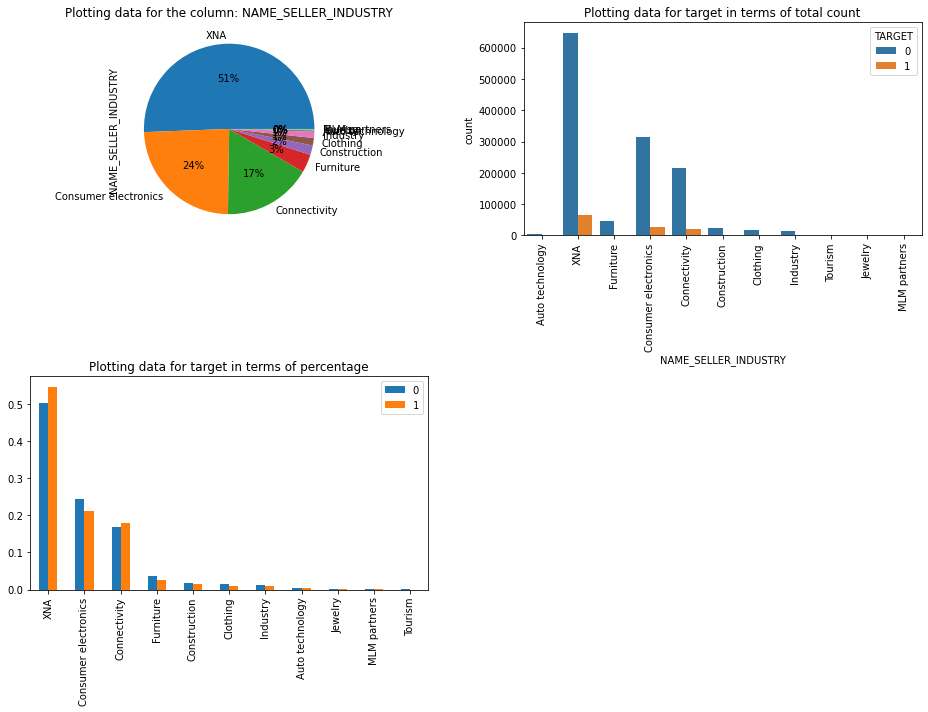

Plotting  FLAG_OWN_REALTY


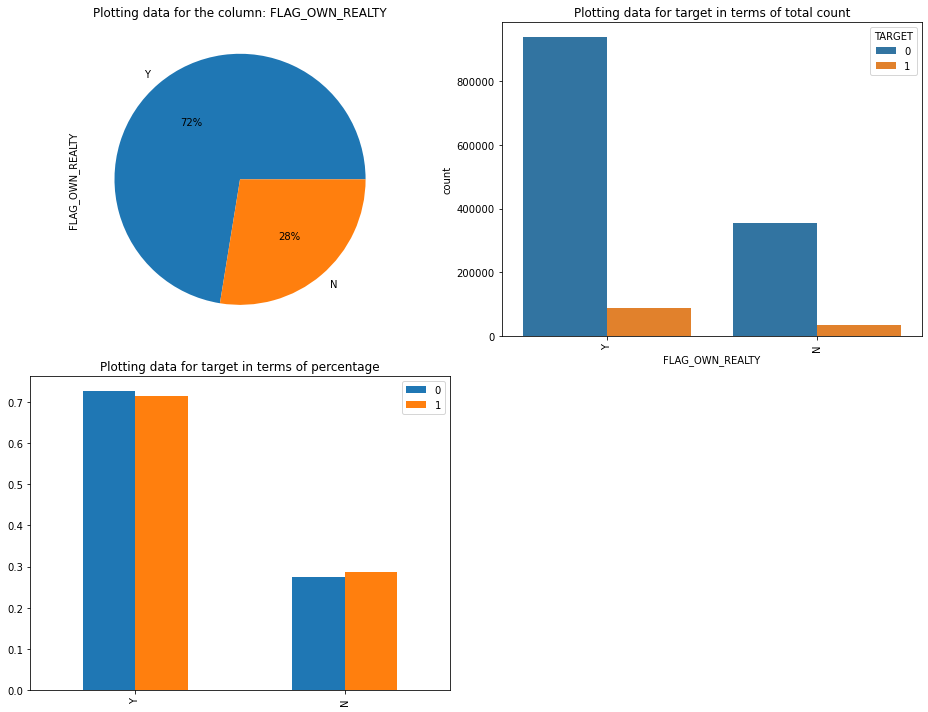

Plotting  CODE_REJECT_REASON


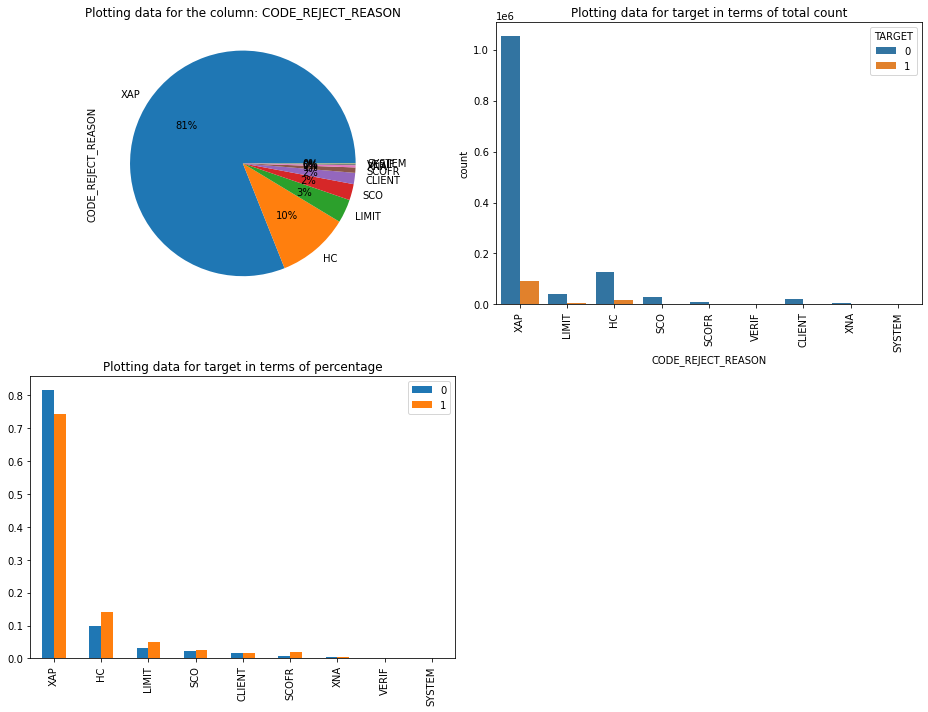

Plotting  OCCUPATION_TYPE


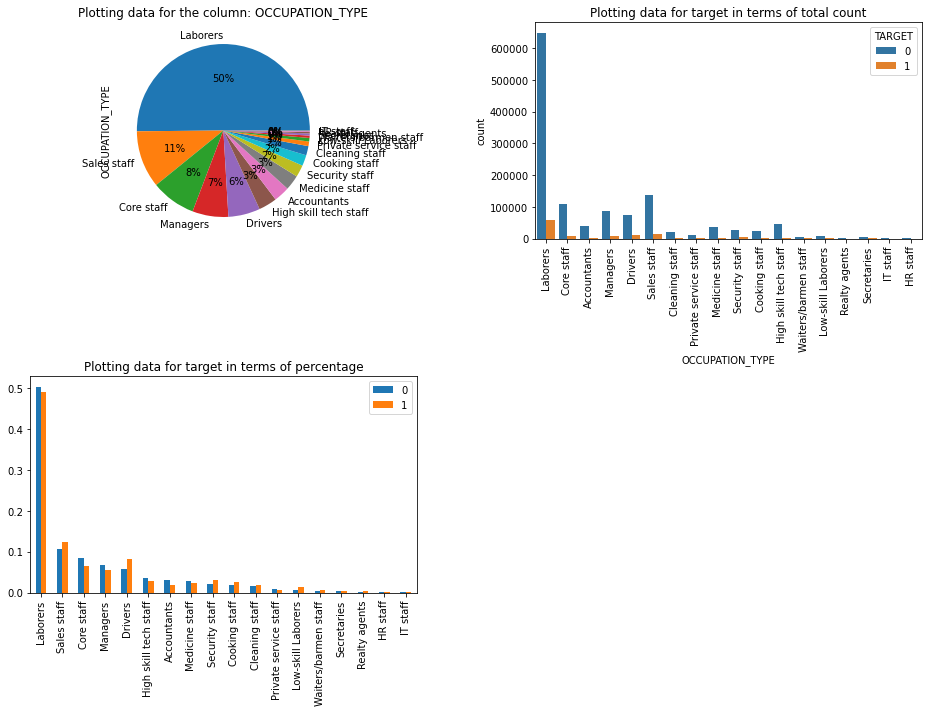

Plotting  NAME_PRODUCT_TYPE


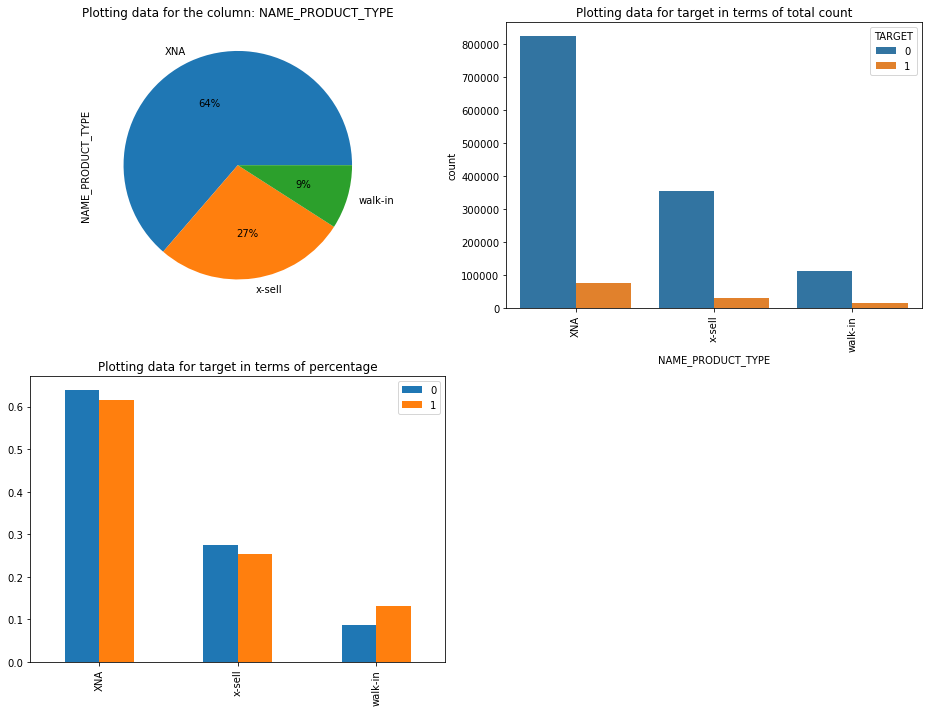

In [74]:
for column in cat_col:
    print("Plotting ", column)
    plotting(fdata,train_0, train_1, column)

## Bivariate and Multivariate Analysis

Adding a new buisness driven column containg the savings of any individual

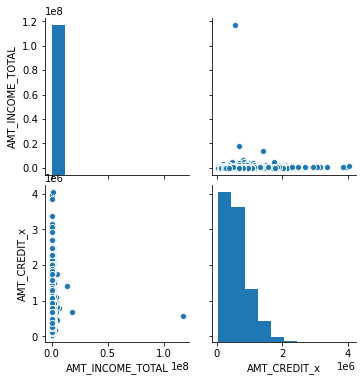

In [75]:
#plot the pair plot of income and amount credit

sns.pairplot(data=fdata, vars=[ 'AMT_INCOME_TOTAL',  'AMT_CREDIT_x' ])
plt.show()

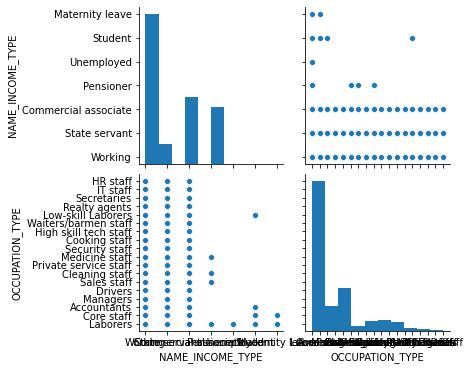

In [76]:
#plot the pair plot of income type and occupation type

sns.pairplot(data=fdata, vars=[ 'NAME_INCOME_TYPE',  'OCCUPATION_TYPE'])
plt.show()

In [77]:
fdata.insert(4, column='savings', value= fdata['AMT_INCOME_TOTAL']-fdata['AMT_ANNUITY_x'] )
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


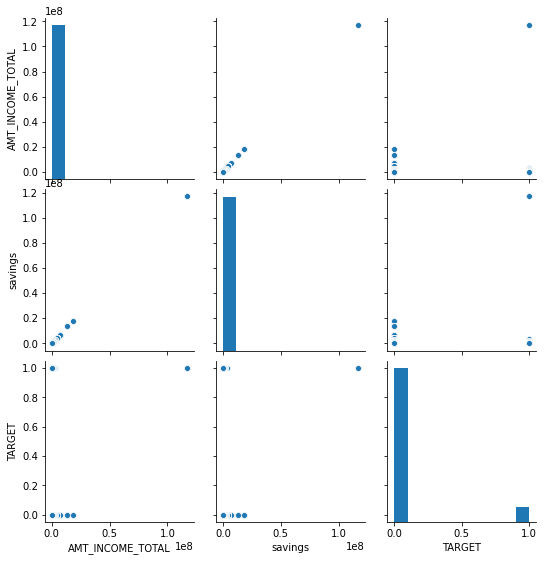

In [78]:
#plot the pair plot of income  and savings

sns.pairplot(data=fdata, vars=['AMT_INCOME_TOTAL' , 'savings' , 'TARGET'])
plt.show()

### NUMERICAL COLUMNS

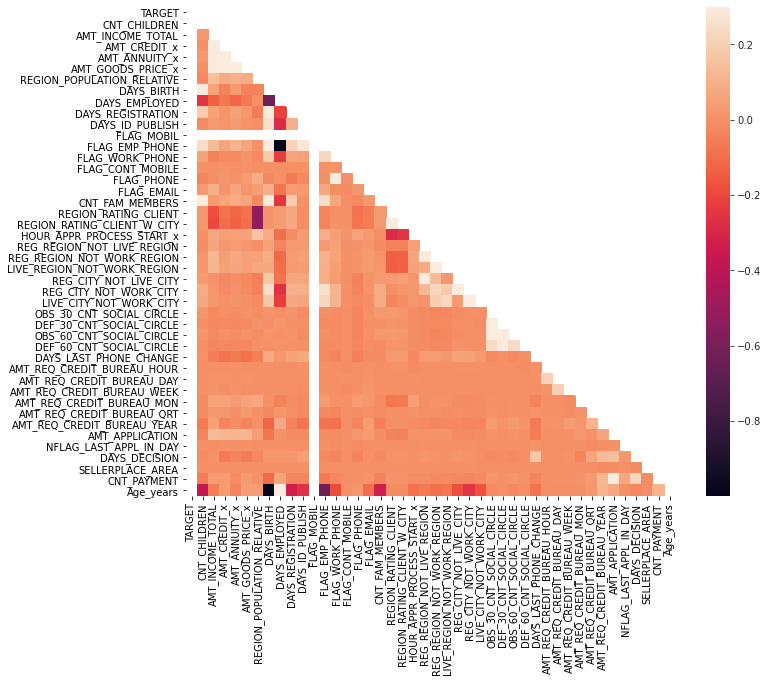

In [79]:
import numpy as np
corr = train_0.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True);

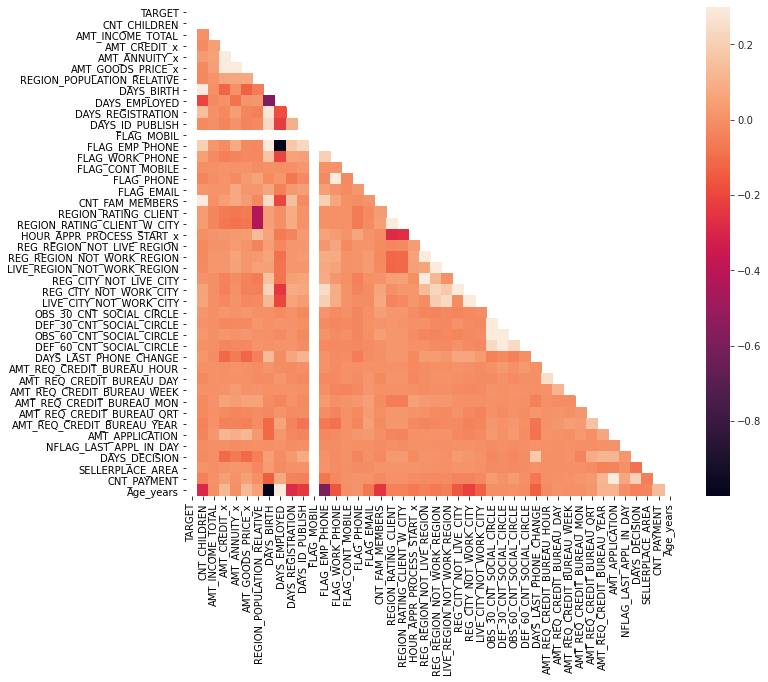

In [80]:
import numpy as np
corr = train_1.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
with sns.axes_style("darkgrid"):
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True);

# FINDING THE TOP 10 CORRELATION

In [81]:
corr_0 = train_0.corr().abs().unstack().sort_values().dropna()

In [82]:
corr_1 = train_1.corr().abs().unstack().sort_values().dropna()

In [83]:
# to remove same column correlations
corr_0 = corr_0[corr_0 != 1.0]
corr_1 = corr_1[corr_1 != 1.0]

In [84]:
# Top 10 correlation
# Printing 20 top rows because 2 rows are set of same pair of columns
corr_0.tail(20).sort_values(ascending = False)

DAYS_EMPLOYED                FLAG_EMP_PHONE                 0.999774
FLAG_EMP_PHONE               DAYS_EMPLOYED                  0.999774
DAYS_BIRTH                   Age_years                      0.999709
Age_years                    DAYS_BIRTH                     0.999709
OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE       0.998577
OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE       0.998577
AMT_CREDIT_x                 AMT_GOODS_PRICE_x              0.986271
AMT_GOODS_PRICE_x            AMT_CREDIT_x                   0.986271
REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY    0.944355
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT           0.944355
CNT_FAM_MEMBERS              CNT_CHILDREN                   0.878468
CNT_CHILDREN                 CNT_FAM_MEMBERS                0.878468
REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION    0.875760
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.875760
DEF_30_CNT_SOCIAL_CIRCLE     DEF_6

In [85]:
# Top 10 correlation
corr_1.tail(20).sort_values(ascending = False)

FLAG_EMP_PHONE               DAYS_EMPLOYED                  0.999788
DAYS_EMPLOYED                FLAG_EMP_PHONE                 0.999788
DAYS_BIRTH                   Age_years                      0.999684
Age_years                    DAYS_BIRTH                     0.999684
OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE       0.998378
OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE       0.998378
AMT_CREDIT_x                 AMT_GOODS_PRICE_x              0.982356
AMT_GOODS_PRICE_x            AMT_CREDIT_x                   0.982356
REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY    0.956483
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT           0.956483
CNT_CHILDREN                 CNT_FAM_MEMBERS                0.886300
CNT_FAM_MEMBERS              CNT_CHILDREN                   0.886300
REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION    0.873130
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.873130
DEF_60_CNT_SOCIAL_CIRCLE     DEF_3

# Analysing data using scatter plot

## Outlier Analysis

In [86]:
fdata.index

Int64Index([      0,       1,       2,       3,       4,       5,       6,
                  7,       8,       9,
            ...
            1413691, 1413692, 1413693, 1413694, 1413695, 1413696, 1413697,
            1413698, 1413699, 1413700],
           dtype='int64', length=1413646)

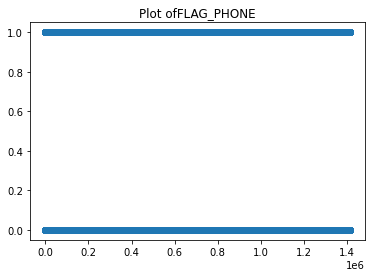

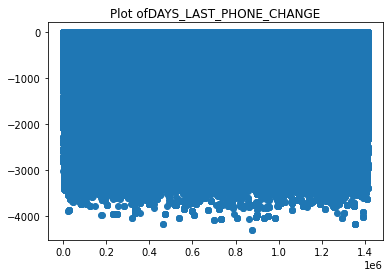

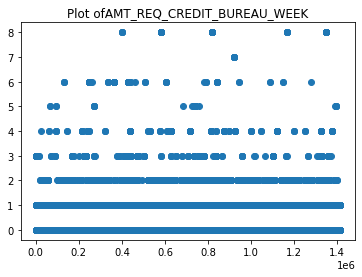

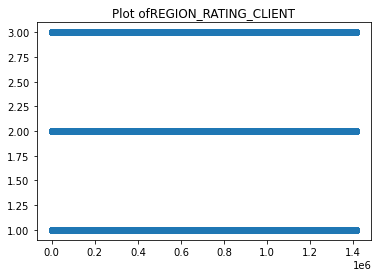

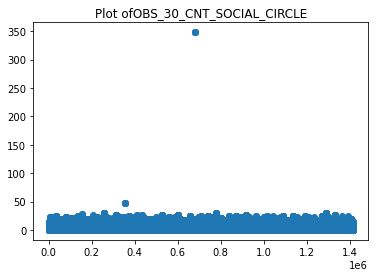

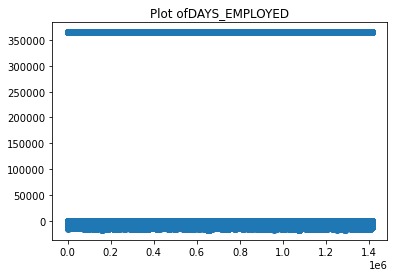

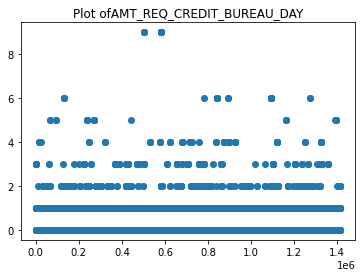

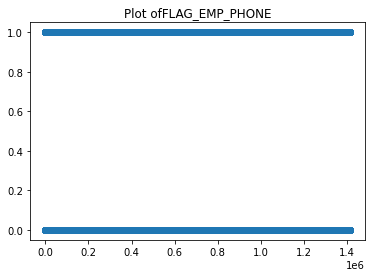

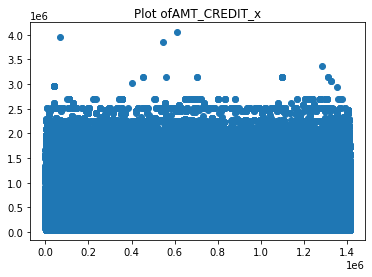

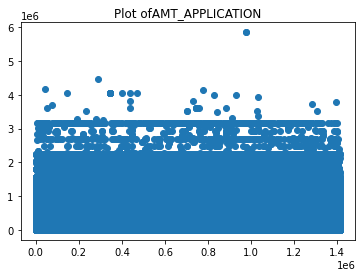

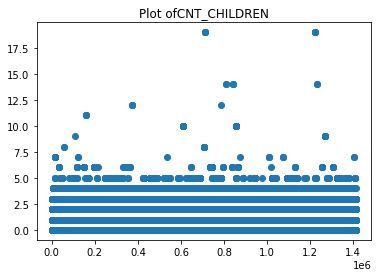

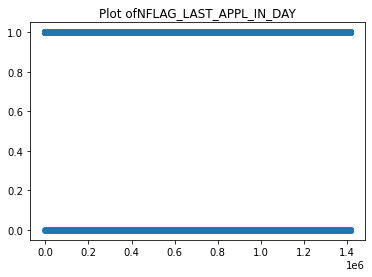

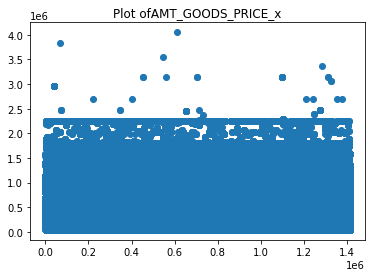

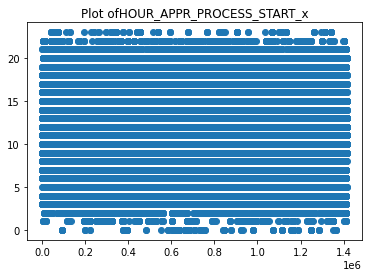

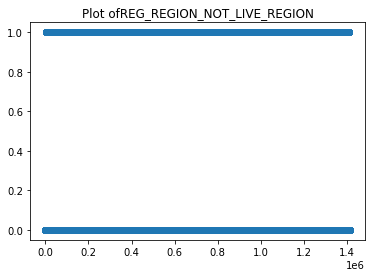

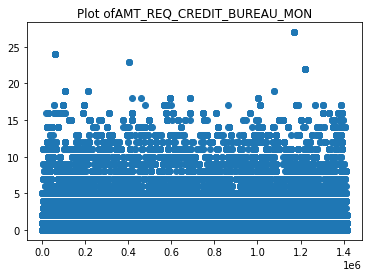

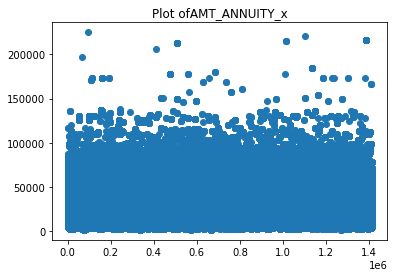

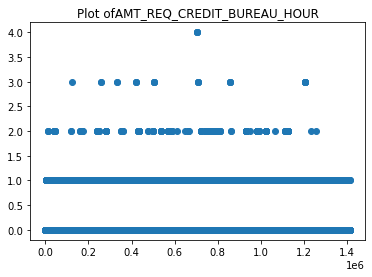

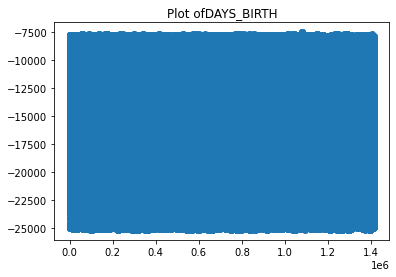

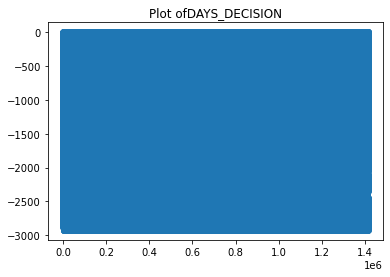

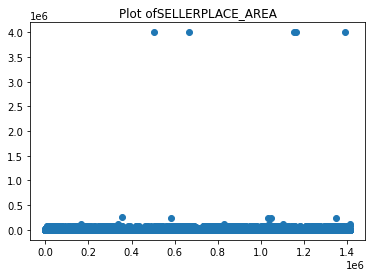

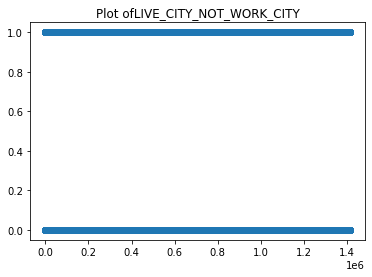

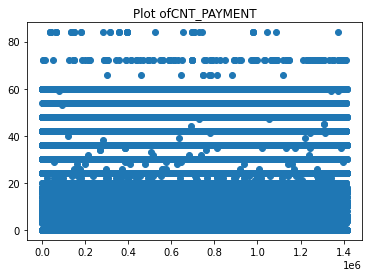

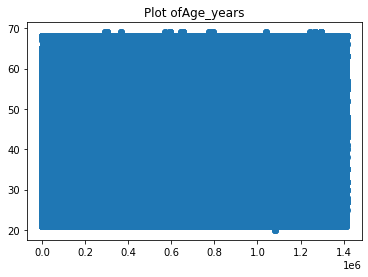

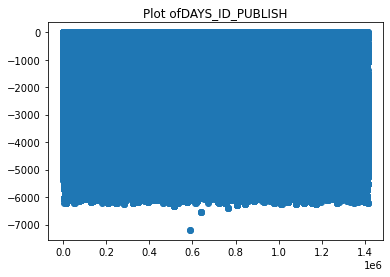

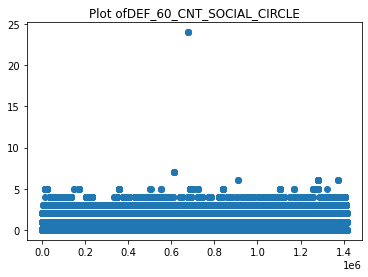

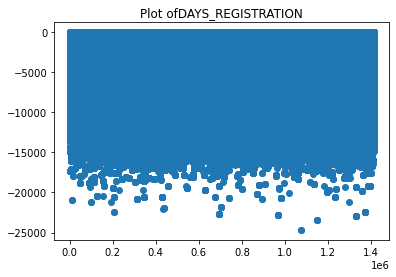

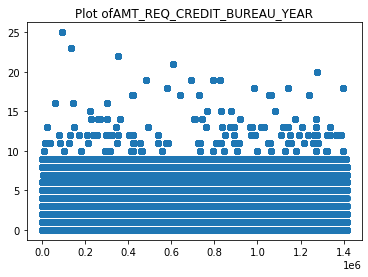

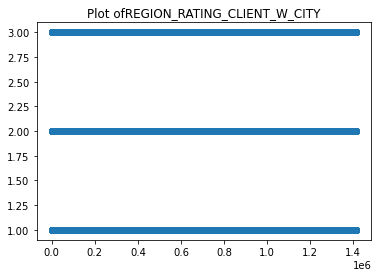

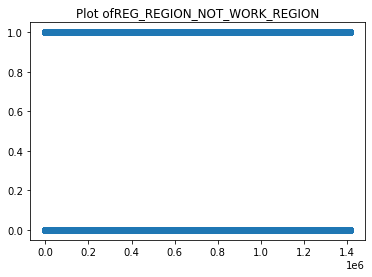

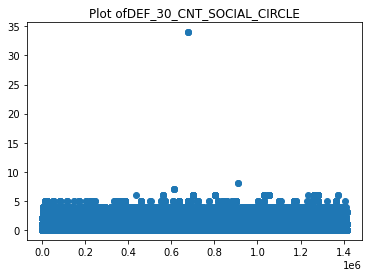

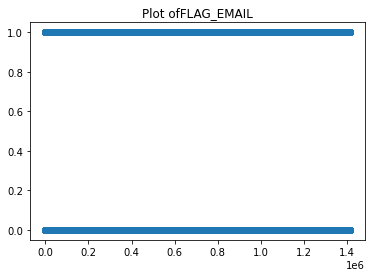

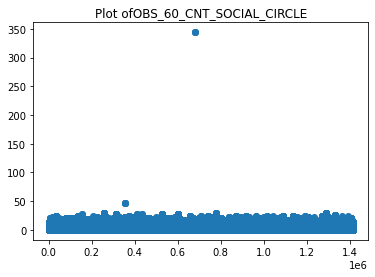

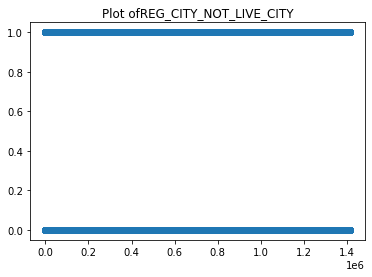

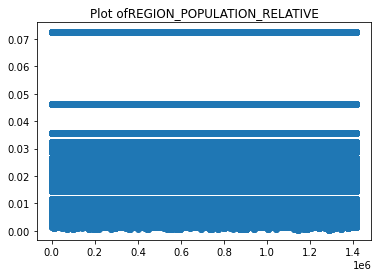

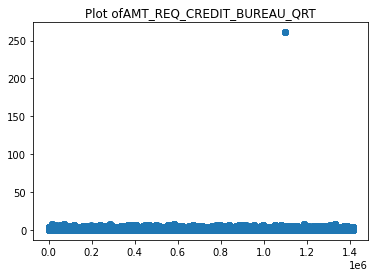

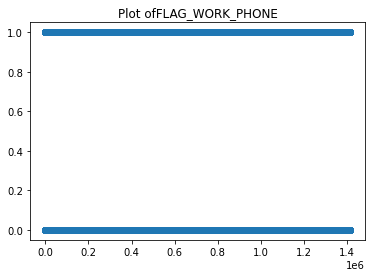

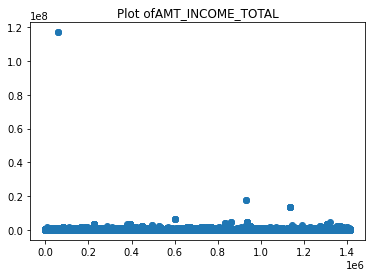

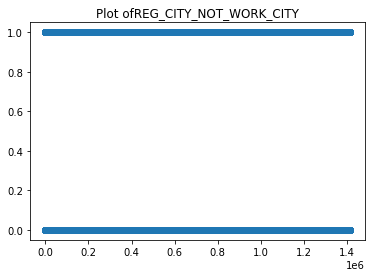

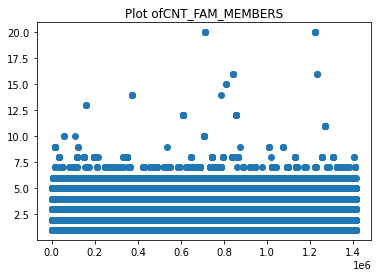

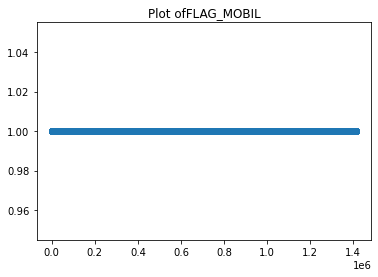

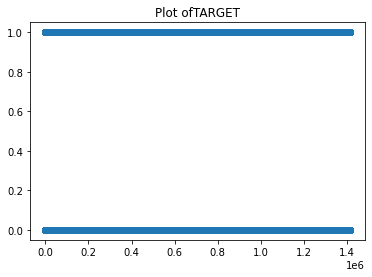

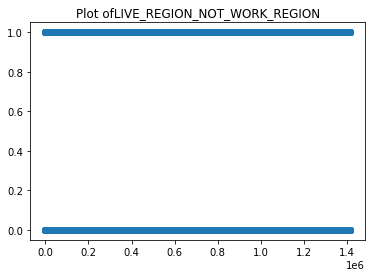

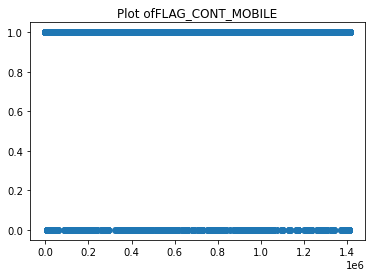

In [87]:
for column in num_col:
    plt.scatter(fdata.index,fdata[column])
    plt.title ("Plot of"+ column)
    plt.show()